## wavelength = 625nm

In [1]:
from df_maker import df, files
from astropy.io import fits
from df_maker import datas, drc
from aperture_sum import ap_sum

import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.colors as colors
import numpy as np
from photutils.aperture import CircularAperture

from astropy.visualization import ImageNormalize, ManualInterval
from matplotlib import pyplot as plt

from datetime import datetime


import matplotlib.dates as md


/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01i1q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01isq_skymatch_mask_sci2.fits
/Users/iman/Documents/47project/flcs/IBJ203010/id5v02i8q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gyq_flc.fits
/Users/iman/Documents/47project/flcs/IBJ203010/iby404jwq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r02jmq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gwq_sci1_blt.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gqq_sci1_final_mask.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01i5q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/id5v02hzq_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ic2r01j2q_skymatch_mask_sci1.fits
/Users/iman/Documents/47project/flcs/IBJ203010/ibj203gqq_sci2_single_mask.fits
/Users/iman/Documents/47project/flcs/IBJ203010/j6ll01xzq_s

In [2]:
w = 625 # wavelength

In [3]:
# from astropy.time import Time
# t1 = Time(df['Times'].to_list(),format = 'iso')
# df['Time as Object']=t1
# df.sort_values(by = 'Filter nm', inplace = True)

In [4]:
s1_coords = df.loc[(df['Filter nm'] == w)]['Star 1'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s1 = CircularAperture(s1_coords, r=3.0) # star 1 aperture in 435nm data
sumstar1 = ap_sum(df, w,datas,ap435_s1)

s2_coords = df.loc[(df['Filter nm'] == w)]['Star 2'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s2 = CircularAperture(s2_coords, r=3.0) # star 2 aperture in 435nm data
sumstar2 = ap_sum(df, w,datas,ap435_s2)

s3_coords = df.loc[(df['Filter nm'] == w)]['Star 3'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s3 = aperture = CircularAperture(s3_coords, r=3.0)
sumstar3 = ap_sum(df, w,datas,ap435_s3)

s4_coords = df.loc[(df['Filter nm'] == w)]['Star 4'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_s4 = CircularAperture(s4_coords, r=3.0)
sumstar4 = ap_sum(df, w,datas,ap435_s4)

s_coords = df.loc[(df['Filter nm'] == w)]['Coordinates'][df.loc[(df['Filter nm'] == w)].index[0]]
ap435_source = CircularAperture(s_coords, r=3.0)
sumstar_s = ap_sum(df, w,datas,ap435_source)

19 625
22 625
25 625
[511.36457253303786, 595.3437622041444, 542.4013898167832]
19 625
22 625
25 625
[247.3811408445262, 281.06593286792247, 288.92757782048983]
19 625
22 625
25 625
[4311.859838155657, 4292.738822666632, 4261.465372547326]
19 625
22 625
25 625
[581.7657309334835, 656.4415454263723, 641.1908068149595]
19 625
22 625
25 625
[190.30733784545004, 168.3843055523708, 177.23292661606882]


In [5]:
df.loc[(df['Filter nm'] == w)]
df_w = pd.DataFrame({"Filename": df.loc[(df['Filter nm'] == w)]['Filename'], "Filter nm": df.loc[(df['Filter nm'] == w)]['Filter nm'], 
                      "Times": df.loc[(df['Filter nm'] == w)]['Times'],"Time as Object": df.loc[(df['Filter nm'] == w)]['Time as Object'],
                      "Day": df.loc[(df['Filter nm'] == w)]['Day'],"Coordinates": df.loc[(df['Filter nm'] == w)]['Coordinates'], 
                      "Exposure": df.loc[(df['Filter nm'] == w)]['Exposure'],
                     "Star 1 Flux": sumstar1, "Star 2 Flux": sumstar2, "Star 3 Flux": sumstar3, "Star 4 Flux": sumstar4,
                     "Source Flux": sumstar_s})
df_w.sort_values(by=['Filter nm'], ascending=True, inplace=True)
df_w

,Filename,Filter nm,Times,Time as Object,Day,Coordinates,Exposure,Star 1 Flux,Star 2 Flux,Star 3 Flux,Star 4 Flux,Source Flux
25,J8FW01020,625,2002-09-30 1:35:02,2002-09-30 01:36:06.184,30,"(3386.6029, 2166.3439)",465,511.364573,247.381141,4311.859838,581.765731,190.307338
28,J8FW02020,625,2002-10-02 20:46:55,2002-10-02 20:47:59.184,2,"(3387.0348, 2166.403)",455,595.343762,281.065933,4292.738823,656.441545,168.384306
31,J8FW03020,625,2002-10-11 2:15:56,2002-10-11 02:17:00.184,11,"(3386.9086, 2166.1548)",400,542.401390,288.927578,4261.465373,641.190807,177.232927


In [6]:
# add relative magnitudes
#relative magnitudes of candidate
df_w['S1-Source Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar_s))
df_w['S2-Source Mag'] = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar_s))
df_w['S3-Source Mag'] =  2.5 * ( np.log10(sumstar3) - np.log10(sumstar_s))
df_w['S4-Source Mag'] = 2.5 * ( np.log10(sumstar4) - np.log10(sumstar_s))
#total flux of stars
df_w['S1 Mag'] = 2.5*np.log10(sumstar1)
df_w['S2 Mag'] = 2.5 *np.log10(sumstar2)
df_w['S3 Mag'] = 2.5 * np.log10(sumstar3)
df_w['S4 Mag'] = 2.5 * np.log10(sumstar4)
df_w['Source Mag'] = 2.5 * np.log10(sumstar_s)
#relative magnitudes of background stars
df_w['S1-S2 Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar2))
df_w['S1-S3 Mag'] = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar3))
df_w['S1-S4 Mag'] = s1s4 = 2.5 * ( np.log10(sumstar1) - np.log10(sumstar4))
df_w['S2-S3 Mag'] = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar3))
df_w['S2-S4 Mag'] = s2s4 = 2.5 * ( np.log10(sumstar2) - np.log10(sumstar4))
df_w['S4-S3 Mag'] = s4s3 = 2.5 * ( np.log10(sumstar4) - np.log10(sumstar3))

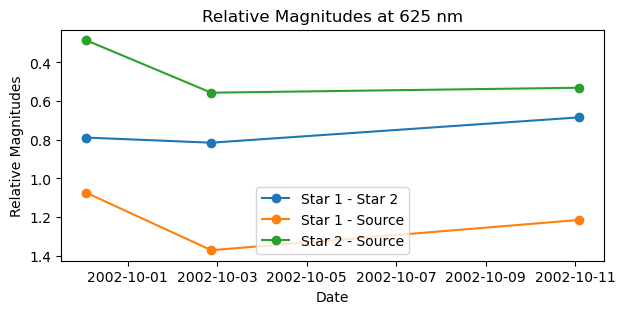

In [8]:
fig,ax = plt.subplots(nrows = 1, ncols=1, figsize = (7,3))#, subplot_kw={'projection': wcs})
        
ax.set_title('Relative Magnitudes at 625 nm')
ax.plot(df_w['Time as Object'], df_w['S1-S2 Mag'], label = 'Star 1 - Star 2',marker = 'o')
ax.plot(df_w['Time as Object'], df_w['S1-Source Mag'], label = 'Star 1 - Source', marker = 'o')
ax.plot(df_w['Time as Object'], df_w['S2-Source Mag'], label = 'Star 2 - Source',marker = 'o')

ax.set_ylabel("Relative Magnitudes")
ax.set_xlabel("Date")

ax.invert_yaxis()

ax.legend()